In [1]:
# Author       : Sumitava Roy
# E-Mail       : r.sumitav@gmail.com
# Contact      : +91-7602222182
# Regression Analysis for House Prices

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
(import warnings
warnings.filterwarnings('ignore'))
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm=LinearRegression()

In [3]:
plt.rcParams['figure.figsize'] = [12,12]
sns.set_style('darkgrid')

In [4]:
house = pd.read_csv("Dataset/maison.csv")

In [5]:
# house.head()

In [6]:
#translating the Index names to English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [7]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


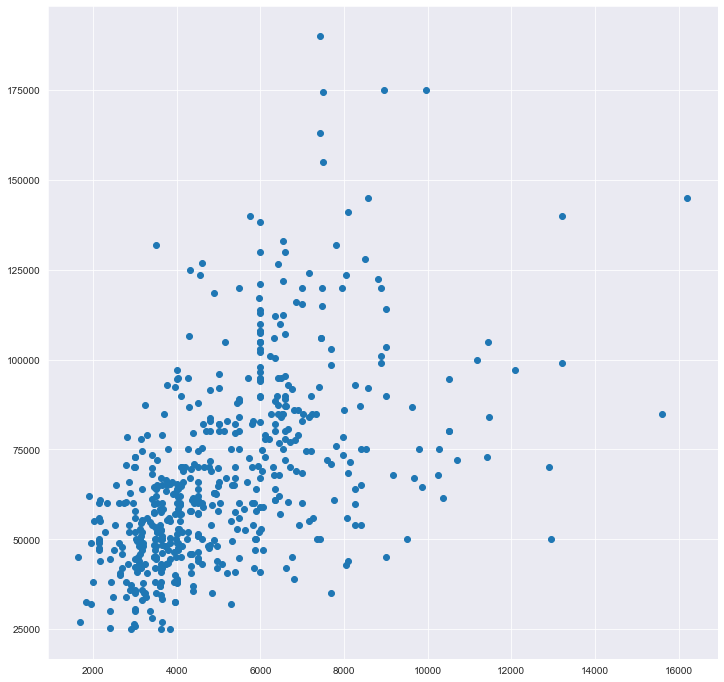

In [8]:
plt.scatter(house['area'], house['price'])
plt.show()

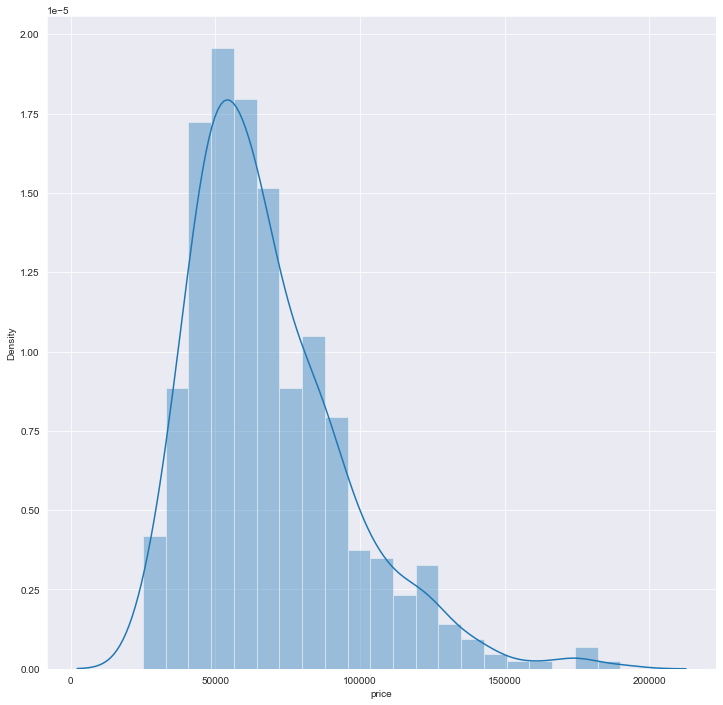

In [9]:
sns.distplot(house['price'])
plt.show()

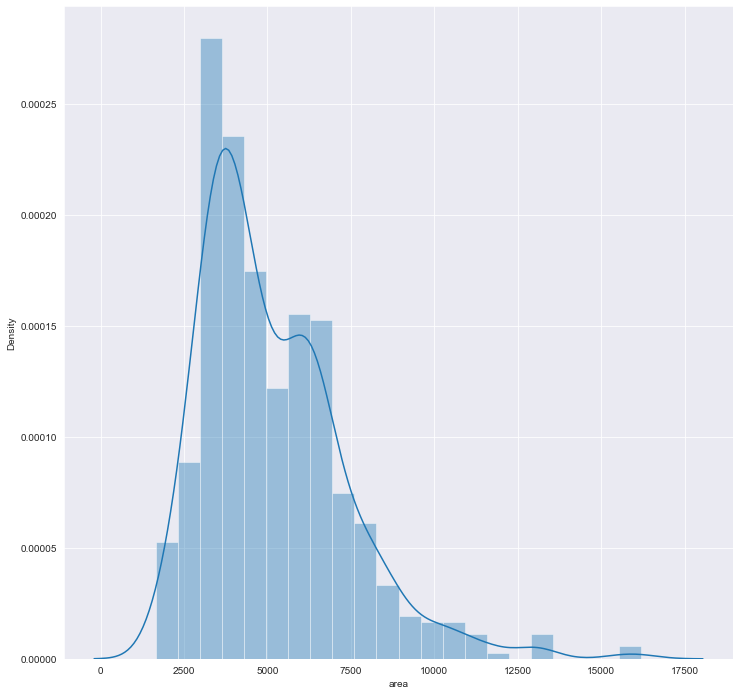

In [10]:
sns.distplot(house['area'])
plt.show()

In [11]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

In [12]:
x = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

<AxesSubplot:>

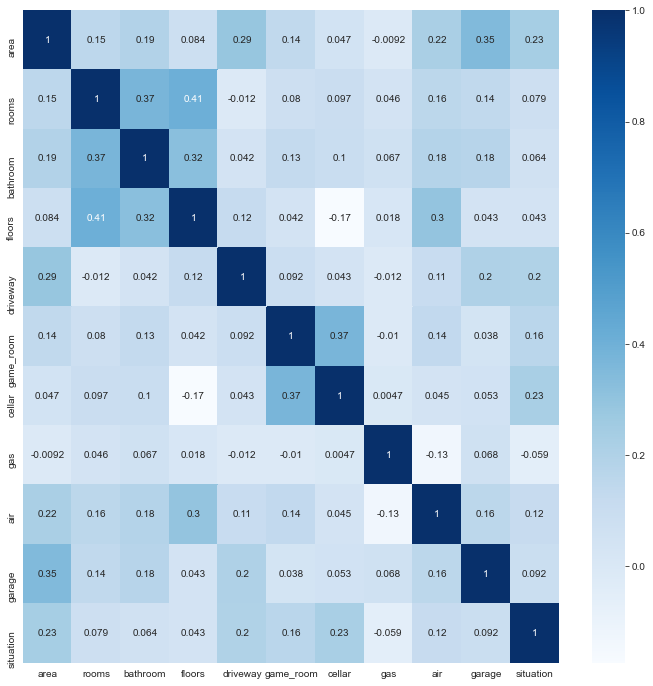

In [13]:
corr = x.corr()
corr
sns.heatmap(corr, cmap = 'Blues', cbar = True, annot = True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=105)

In [15]:
import statsmodels.api as sm

In [16]:
model1 = lm.fit(x_test,y_test)
predictions1 = lm.predict(x_test)

In [17]:
print ("Score: " , model1.score(x_test, y_test))

Score:  0.729483646814399


In [146]:
# print(lm.coef_)

In [145]:
# coef = pd.DataFrame(lm.coef_, x2.columns, columns = ['Coefficients'])
# coef

In [25]:
house.columns

Index(['price', 'area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation'],
      dtype='object')

In [26]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(house))
print(z)

[[0.97913617 0.32302806 0.0472349  ... 0.68103375 0.35756661 0.55337157]
 [1.11032939 0.53101296 1.31014696 ... 0.68103375 0.80452487 0.55337157]
 [0.69800783 0.96495812 0.0472349  ... 0.68103375 0.80452487 0.55337157]
 ...
 [1.30737434 0.39227462 0.0472349  ... 1.46835601 0.35756661 0.55337157]
 [1.3823419  0.39227462 0.0472349  ... 1.46835601 0.35756661 0.55337157]
 [1.3823419  0.39227462 0.0472349  ... 1.46835601 0.35756661 0.55337157]]


In [27]:
threshold = 3
print(np.where(z > 3))

# The first array contains the list of row numbers and second array respective column numbers

(array([ 43,  53,  54,  92, 101, 102, 103, 116, 125, 126, 145, 147, 148,
       155, 164, 171, 175, 185, 197, 204, 216, 216, 231, 237, 256, 304,
       314, 331, 331, 337, 337, 354, 358, 361, 362, 364, 365, 365, 367,
       368, 368, 377, 382, 418, 419, 446, 465, 490, 515, 532, 533],
      dtype=int64), array([3, 8, 3, 0, 3, 8, 8, 8, 8, 3, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 3, 8,
       8, 2, 3, 8, 8, 0, 3, 0, 3, 2, 1, 3, 0, 1, 1, 8, 8, 1, 3, 0, 1, 0,
       8, 8, 8, 1, 8, 1, 8], dtype=int64))


In [28]:
print(z[43][3])  # to show how the above arrays work

3.4169687847089953


In [29]:
house_o = house[(z < 3).all(axis=1)]  # removing Outliers

In [30]:
house.shape

(546, 12)

In [31]:
house_o.shape

(500, 12)

In [32]:
x2 = house_o[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y2 = house_o['price']

In [33]:
x2_train, x2_test, y2_train, y2_test = train_test_split( x2, y2, test_size=0.2, random_state=7)

#Feature scaling or data normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test) 

In [34]:
model = lm.fit(x2_test,y2_test)
predictions = lm.predict(x2_test)
print ("R-squared Score: " , model.score(x2_test, y2_test))

R-squared Score:  0.7993412305567573


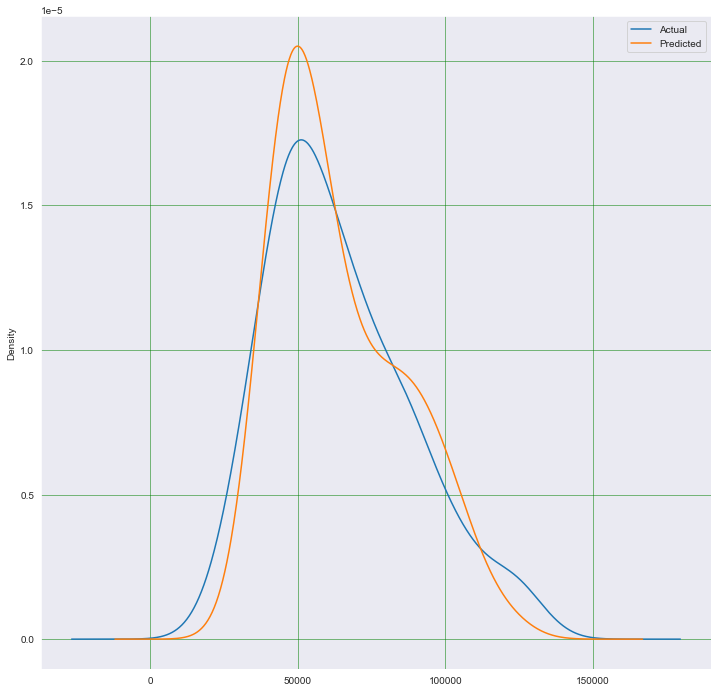

In [35]:
# #comparing the original and predicted values.

df1 = pd.DataFrame({'Actual': y2_test, 'Predicted': predictions})
df1.plot(kind='kde')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

<AxesSubplot:xlabel='price'>

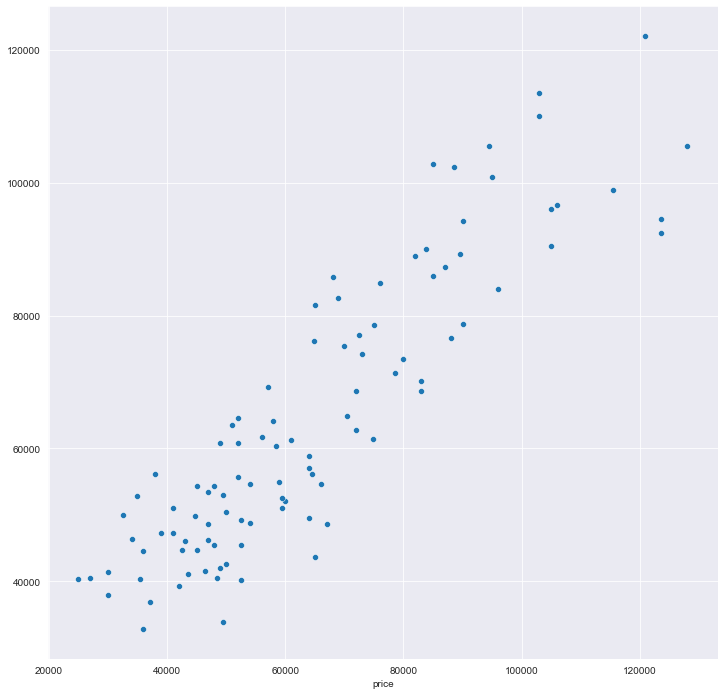

In [36]:
# To check the quality of our model, let's plot it
sns.scatterplot(y2_test, predictions)

In [37]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y2_test, predictions))
print('MSE :', metrics.mean_squared_error(y2_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y2_test, predictions)))

MAE : 8709.09892493477
MSE : 113119514.91101722
RMSE : 10635.765835661165


In [38]:
x2_endog = sm.add_constant(x2_test)

In [39]:
res = sm.OLS(y2_test, x2_endog)
res.fit()

In [40]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     35.45
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           7.72e-27
Time:                        21:20:28   Log-Likelihood:                -1069.1
No. Observations:                 100   AIC:                             2160.
Df Residuals:                      89   BIC:                             2189.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.418e+04   7114.740      1.993      0.049      43.616    2.83e+04
area           4.4913      0.732      6.138      0.000       3.038       5.945
rooms      -4020.2282   2069.582     -1.943      0.055   -8132.444      91.988
bathroom     1.07e+04   3114.699      3.435      0.001    4510.342    1.69e+04
floors      7040.1151   1713.625      4.108      0.000    3635.179    1.04e+04
driveway     208.5991   3557.934      0.059      0.953   -6860.941    7278.139
game_room    1.79e+04   3279.048      5.460      0.000    1.14e+04    2.44e+04
cellar      5036.5167   2988.107      1.686      0.095    -900.788     1.1e+04
gas           9.3e-13   6.44e-13      1.445      0.152   -3.49e-13    2.21e-12
air         1.109e+04   2782.243      3.987      0.000    5564.338    1.66e+04
garage      2216.1089   1559.122      1.421      0.159    -881.832    5314.050
situation   9195.1688   3036.596      3.028      0.003    3161.517    1.52e+04
==============================================================================
Omnibus:                        3.293   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.195
Skew:                           0.433   Prob(JB):                        0.202
Kurtosis:                       2.864   Cond. No.                     5.13e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
# Just the Predictions column for testing data cannot be added on the data set as it shows error ::
# Length of values (100) does not match length of index (500)
# Just using the testing data and comparing it with respective prices on the below codes

In [41]:
#creating a column in the testing file to add it on the final dataset

x2_test['predictions']=predictions

In [45]:
#CReating the final Dataset

house_f = pd.merge(house_o,x2_test['predictions'],how = 'left',left_index = True, right_index = True)

In [46]:
house_f.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation,predictions
0,42000,5850,3,1,2,1,0,1,0,0,1,0,NaN
1,38500,4000,2,1,1,1,0,0,0,0,0,0,NaN
2,49500,3060,3,1,1,1,0,0,0,0,0,0,33811.192119
3,60500,6650,3,1,2,1,1,0,0,0,0,0,NaN
4,61000,6360,2,1,1,1,0,0,0,0,0,0,NaN


In [47]:
house_f['Margin of Error'] = ((house_f['price'])-house_f['predictions'])

In [48]:
house_f.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation,predictions,Margin of Error
0,42000,5850,3,1,2,1,0,1,0,0,1,0,NaN,NaN
1,38500,4000,2,1,1,1,0,0,0,0,0,0,NaN,NaN
2,49500,3060,3,1,1,1,0,0,0,0,0,0,33811.192119,15688.807881
3,60500,6650,3,1,2,1,1,0,0,0,0,0,NaN,NaN
4,61000,6360,2,1,1,1,0,0,0,0,0,0,NaN,NaN


In [49]:
house_f.to_excel("Housing_Assignment.xlsx")